<p><img alt="UNQ logo" height="45px" width="115px" src="https://sobrelibrosycultura.com/wp-content/uploads/2016/09/quilmes-1.jpg
" align="left" hspace="10px" vspace="0px"></p><h1>Redes Neuronales y Lógica Difusa</h1>

**NOTA 1:** Este ejercicio debe hacerse utilizando un entorno de ejecución local, debido a que necesita un tipo de interacción que no puede tenerse en Google Colab. Para ejecutarlo localmente debe seguir [estos pasos](https://research.google.com/colaboratory/local-runtimes.html).

Si ya había instalado todo solamente hay que correr el siguiente comando en la consola de la PC y luego conectarse a un entorno local en Google Colab y copiar la URL que me entregó la consola.

jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

**NOTA 2:**
Como el entorno de ejecución es local (su PC), hay que tener instalado Git para poder acceder al repositorio de la materia. Para instalarlo deben seguir [estos pasos](https://git-scm.com/book/en/v2/Getting-Started-Installin).

In [ ]:
!git clone https://github.com/redes-unq/Imagenes.git

In [ ]:
!python -m pip install keras
!pip install PyQt6
!pip install PySide6
!pip install PyQt5
!pip install PySide2

In [ ]:
# Selecciono datos de las imágenes haciendo clic

%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.gray()

N = 10 # Cantidad de muestras de cada tipo

# close open figures
plt.close("all")
#plt.ioff()

im = []
im.append(Image.open("Imagenes/mi1.png"));
im.append(Image.open("Imagenes/mi2.png"));
im.append(Image.open("Imagenes/mi3.png"));

ESCALA = 4

clase = []
clase.append('Materia blanca')
clase.append('Materia gris')
clase.append('Líquido cefaloraquideo')
clase.append('Fondo')

target = [1, 0, 0, 0]

p = []
t = []
i = 0

fig = plt.figure(figsize=(1 * ESCALA, 1 * ESCALA), dpi=150)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(131)
ax1.imshow(im[0])

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3 = fig.add_subplot(133)
ax3.imshow(im[2])

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax2 = fig.add_subplot(132)
ax2.imshow(im[1])

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

titulo = plt.suptitle("Ingrese %d muestras por cada tipo" % N, ha='center', fontsize=9)
subtitulo = plt.title("Faltan %d muestras de %s" % (N, clase[0]), ha='center', fontsize=9)

plt.draw()

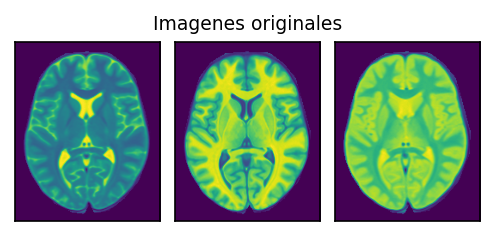

In [9]:
%matplotlib inline

ESCALA = 4

fig = plt.figure(figsize=(1 * ESCALA, 1 * ESCALA), dpi=150)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(131)
ax1.imshow(im[0])

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3 = fig.add_subplot(133)
ax3.imshow(im[2])

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax2 = fig.add_subplot(132)
ax2.imshow(im[1])

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

subtitulo = plt.title("Imagenes originales", ha='center', fontsize=9)

plt.draw()

Epoch 1/800
4/4 [==============================] - 2s 153ms/step - loss: 1.7996 - accuracy: 0.0938 - val_loss: 1.7499 - val_accuracy: 0.0000e+00
Epoch 2/800
4/4 [==============================] - 0s 30ms/step - loss: 1.7755 - accuracy: 0.0938 - val_loss: 1.7377 - val_accuracy: 0.0000e+00
Epoch 3/800
4/4 [==============================] - 0s 61ms/step - loss: 1.7554 - accuracy: 0.1875 - val_loss: 1.7266 - val_accuracy: 0.0000e+00
Epoch 4/800
4/4 [==============================] - 0s 34ms/step - loss: 1.7334 - accuracy: 0.1875 - val_loss: 1.7152 - val_accuracy: 0.0000e+00
Epoch 5/800
4/4 [==============================] - 0s 22ms/step - loss: 1.7138 - accuracy: 0.2500 - val_loss: 1.7051 - val_accuracy: 0.0000e+00
Epoch 6/800
4/4 [==============================] - 0s 23ms/step - loss: 1.6929 - accuracy: 0.2500 - val_loss: 1.6930 - val_accuracy: 0.0000e+00
Epoch 7/800
4/4 [==============================] - 0s 17ms/step - loss: 1.6723 - accuracy: 0.2500 - val_loss: 1.6809 - val_accuracy: 0.

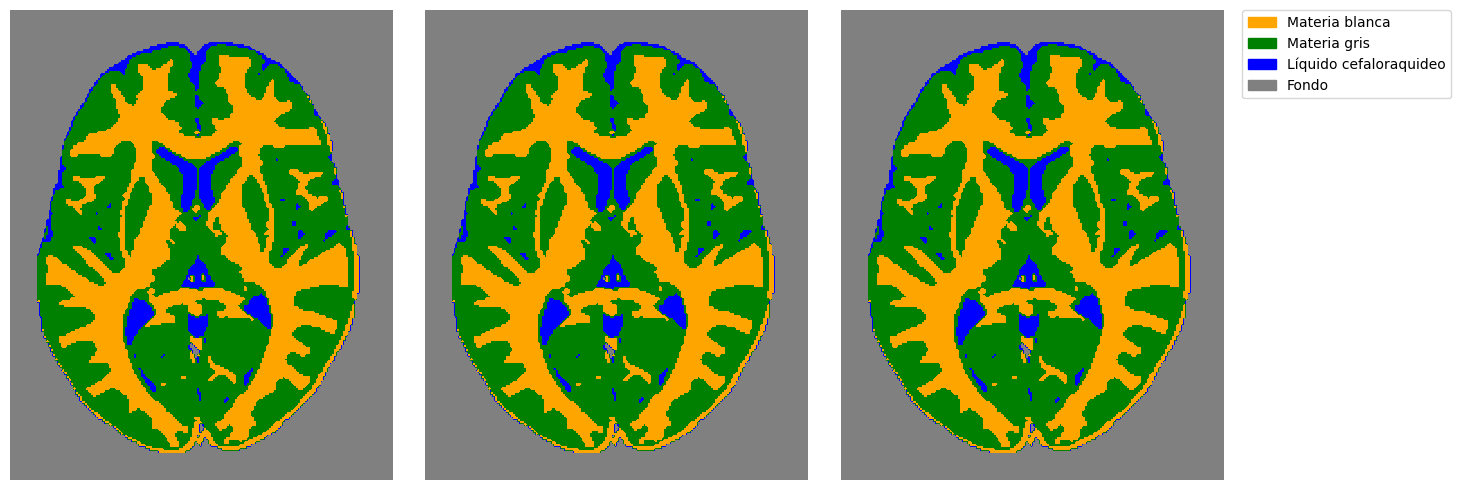

In [10]:
# Ejecuto el algoritmo con los datos obtenidos previamente

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

im = []
im.append(Image.open("Imagenes/mi1.png"));
im.append(Image.open("Imagenes/mi2.png"));
im.append(Image.open("Imagenes/mi3.png"));

p_probados = [(84, 227, 164), (90, 225, 168), (88, 231, 165), (96, 215, 166), (94, 216, 156), (109, 209, 168), (99, 221, 166), (102, 222, 173), (86, 223, 158), (121, 196, 172), (137, 161, 216), (141, 154, 214), (133, 159, 216), (112, 178, 207), (138, 145, 215), (125, 177, 206), (115, 202, 200), (179, 138, 207), (149, 145, 211), (137, 167, 211), (255, 46, 232), (249, 54, 225), (253, 76, 221), (255, 43, 242), (243, 58, 226), (255, 45, 236), (255, 48, 237), (255, 73, 227), (251, 49, 231), (252, 49, 231), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
t_probados = [
    [1., 0., 0., 0.], [1., 0., 0., 0.], [1., 0., 0., 0.], [1., 0., 0., 0.],
    [1., 0., 0., 0.], [1., 0., 0., 0.], [1., 0., 0., 0.], [1., 0., 0., 0.],
    [1., 0., 0., 0.], [1., 0., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.],
    [0., 1., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.],
    [0., 1., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.], [0., 1., 0., 0.],
    [0., 0., 1., 0.], [0., 0., 1., 0.], [0., 0., 1., 0.], [0., 0., 1., 0.],
    [0., 0., 1., 0.], [0., 0., 1., 0.], [0., 0., 1., 0.], [0., 0., 1., 0.],
    [0., 0., 1., 0.], [0., 0., 1., 0.], [0., 0., 0., 1.], [0., 0., 0., 1.],
    [0., 0., 0., 1.], [0., 0., 0., 1.], [0., 0., 0., 1.], [0., 0., 0., 1.],
    [0., 0., 0., 1.], [0., 0., 0., 1.], [0., 0., 0., 1.], [0., 0., 0., 1.]
]

# 'p' y 't' ya están definidos
# Puntos ya probados, si quiero seleccionar nuevo, tengo que comentar estas definiciones:
p = p_probados
t = t_probados

p_array = np.array(p).astype(np.float32)
t_array = np.array(t).astype(np.float32)

# Normalización de los datos de entrada
mean = np.mean(p, axis=0)
std = np.std(p, axis=0)
input_data = (p - mean) / std

# Crear el modelo
model = Sequential([
    Dense(8, activation='relu', input_shape=(3,)),  # Confirmar la dimensión de entrada de 3 canales
    Dense(4, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenamiento del modelo
model.fit(input_data, np.array(t), epochs=800, batch_size=10, validation_split=0.2)

# Clasificar todos los puntos de las imágenes
results = []
# Predicción y visualización de resultados
for img_index, img in enumerate(im):
    width, height = img.size
    all_pixels = [np.array([im[0].getpixel((x, y)), im[1].getpixel((x, y)), im[2].getpixel((x, y))])
                  for y in range(height) for x in range(width)]
    all_pixels = np.array(all_pixels).reshape(-1, 3).astype(np.float32)
    all_pixels_normalized = (all_pixels - mean) / std
    predictions = model.predict(all_pixels_normalized)
    print(f"Ejemplo de predicciones para imagen {img_index+1}: {predictions[:5]}")  # Imprimir primeras 5 predicciones
    class_image = np.argmax(predictions, axis=1).reshape((height, width))
    results.append(class_image)

# Definir las clases y colores
clases = ['Materia blanca', 'Materia gris', 'Líquido cefaloraquideo', 'Fondo']
colores = ['orange', 'green', 'blue', 'grey']
cmap = ListedColormap(colores)

# Crear figura para mostrar los resultados con etiquetas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, result in zip(axes, results):
    ax.imshow(result, cmap=cmap)
    ax.axis('off')

# Añadir una leyenda con las clases
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colores[i], label=clases[i]) for i in range(len(clases))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostrar todo
plt.tight_layout()
plt.show()